In [1]:
# Define a function that generates samples approximate RGO. The target is defined in Potential class.
import numpy as np
import matplotlib.pyplot as plt
import targets
import cProfile
import pstats
import random
import argparse
import os
from utils import target_func, mixing_time, TV_estimation, target_funnel
import matplotlib.ticker as ticker


In [2]:

def estimate_D(step_size, y, f, size = 10):
    dimension = f.dimension
    x_y = f.solve1(y, step_size)
    testFunction = lambda C : np.mean(np.exp(np.abs(Y)**(2/(1+f.alpha))/C))-2
    samples = np.random.multivariate_normal(mean = x_y, cov = step_size * np.identity(dimension), size = size*2)
    Y = np.zeros(size)
    for i in range(size):
        gradient = f.firstOrder(x_y)
        a = f.zeroOrder(samples[i])-np.dot(gradient,samples[i])
        b = f.zeroOrder(samples[i+size])-np.dot(gradient,samples[i+size])
        Y[i] = b-a
    # Estimate the subexponential parameter of Y: find the smallest C>0 such that E[\exp^{\abs(Y)/C}] \leq 2 by binary search for smooth potentials
    # Initialize the interval
    left = 0
    right = dimension**(f.alpha/(f.alpha+1)) # The estimated upper bound of the subexponential parameter
    while testFunction(right)>0:
        left = right
        right = 2*right
    # Initialize the middle point
    mid = (left+right)/2
    # Initialize the value of the function
    f_mid = testFunction(mid)
    while abs(f_mid) > 1e-1:
        if f_mid > 0:
            left = mid
        else:
            right = mid
        mid = (left+right)/2
        f_mid =  testFunction(mid)

    return mid



L=1.0


/home/byuan48/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/byuan48/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


4.582180050781056e-06
4.6886092898511966e-06


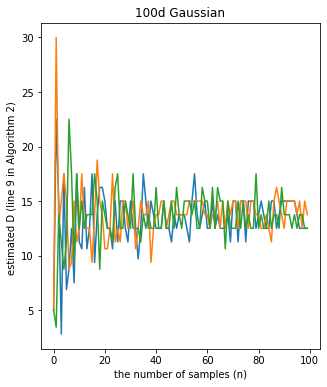

In [41]:
plt.figure(figsize=(5, 6))
dimension = 100
Target = target_func(dimension, if_simple=True)
ys = np.random.multivariate_normal(mean = np.zeros(dimension), cov = np.identity(dimension), size = 3)
for y in ys:
    estimated_one = []
    for i in range(100):
        estimated_one.append(estimate_D(step_size=1, y = y, f = Target, size = i))
    plt.plot(estimated_one)
plt.xlabel('the number of samples (n)')
plt.ylabel('estimated D (line 9 in Algorithm 2) ')
plt.title('100d Gaussian')
plt.savefig('stable_Gaussian.pdf')

L=12.221350628985041


/home/byuan48/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/byuan48/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


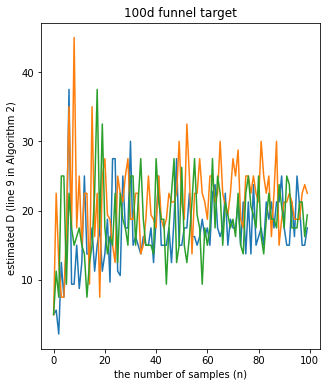

In [40]:
plt.figure(figsize=(5, 6))
dimension = 100
Target = target_funnel(dimension)
ys = np.random.multivariate_normal(mean = np.zeros(dimension), cov = np.identity(dimension), size = 3)
for y in ys:
    estimated_one = []
    for i in range(100):
        estimated_one.append(estimate_D(step_size=1, y = y, f = Target, size = i))
    plt.plot(estimated_one)
plt.xlabel('the number of samples (n)')
plt.ylabel('estimated D (line 9 in Algorithm 2) ')
plt.title('100d funnel target')
plt.savefig('stable_funnel.pdf')

L=1.0


/home/byuan48/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/byuan48/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


L=11.205539149504288


/home/byuan48/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/byuan48/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_2348475/951892470.py:4: RuntimeWarning: overflow encountered in exp
  testFunction = lambda C : np.mean(np.exp(np.abs(Y)**(2/(1+f.alpha))/C))-2


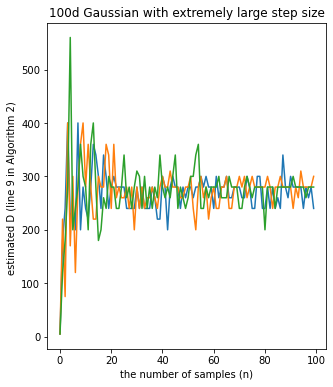

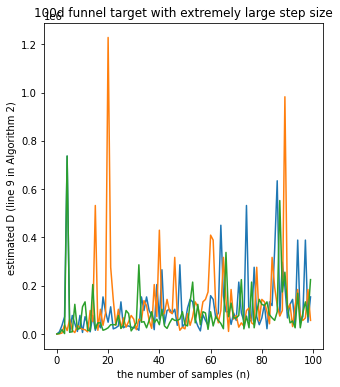

In [3]:
# estimated D is unstable for large step size, for instance, 20 for Gaussian and funnel
plt.figure(figsize=(5, 6))
dimension = 100
Target = target_func(dimension, if_simple=True)
ys = np.random.multivariate_normal(mean = np.zeros(dimension), cov = np.identity(dimension), size = 3)
for y in ys:
    estimated_one = []
    for i in range(100):
        estimated_one.append(estimate_D(step_size=20, y = y, f = Target, size = i))
    plt.plot(estimated_one)
plt.xlabel('the number of samples (n)')
plt.ylabel('estimated D (line 9 in Algorithm 2) ')
plt.title('100d Gaussian with extremely large step size')
plt.savefig('stable_Gaussian_large.pdf')

plt.figure(figsize=(5, 6))
dimension = 100
Target = target_funnel(dimension)
ys = np.random.multivariate_normal(mean = np.zeros(dimension), cov = np.identity(dimension), size = 3)
for y in ys:
    estimated_one = []
    for i in range(100):
        estimated_one.append(estimate_D(step_size=20, y = y, f = Target, size = i))
    plt.plot(estimated_one)
plt.xlabel('the number of samples (n)')
plt.ylabel('estimated D (line 9 in Algorithm 2) ')
plt.title('100d funnel target with extremely large step size')
plt.savefig('stable_funnel_large.pdf')

In [49]:
for _ in range(1000):
    np.random.multivariate_normal(mean = np.zeros(dimension), cov = np.identity(dimension), size = 10)